# 1. Import and Install Dependencies 

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image,results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right

In [5]:
def draw_styled_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,122,10), thickness=2, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,144,121), thickness=2, circle_radius=1))# Draw pose connections

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=1)) # Draw left hand connections
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=1)) # Draw right

In [6]:
cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret,frame=cap.read()
        
        # Make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        #draw landmarks
        draw_styled_landmarks(image,results)
        
        # show to screen
        cv2.imshow('OpneCV feed',image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [8]:
frame

array([[[235, 233, 226],
        [232, 230, 223],
        [230, 228, 221],
        ...,
        [156, 149, 154],
        [150, 143, 148],
        [156, 149, 154]],

       [[234, 233, 223],
        [232, 231, 221],
        [231, 230, 220],
        ...,
        [159, 151, 156],
        [155, 146, 152],
        [157, 150, 155]],

       [[233, 233, 219],
        [232, 232, 218],
        [232, 232, 218],
        ...,
        [155, 145, 151],
        [152, 143, 149],
        [151, 144, 149]],

       ...,

       [[ 76,  88, 100],
        [ 74,  86,  98],
        [ 73,  84,  96],
        ...,
        [ 45,  48,  52],
        [ 46,  49,  53],
        [ 46,  49,  53]],

       [[ 72,  84,  95],
        [ 70,  82,  93],
        [ 69,  80,  91],
        ...,
        [ 44,  49,  51],
        [ 44,  49,  52],
        [ 45,  49,  53]],

       [[ 71,  84,  93],
        [ 68,  81,  90],
        [ 68,  79,  89],
        ...,
        [ 42,  48,  50],
        [ 42,  48,  50],
        [ 43,  49,  52]]

In [9]:
draw_styled_landmarks(frame,results)

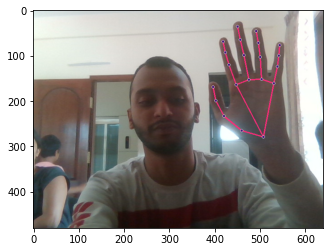

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
results.pose_landmarks

landmark {
  x: 0.42373529076576233
  y: 0.47831952571868896
  z: -0.5992171168327332
  visibility: 0.9999794363975525
}
landmark {
  x: 0.4498586654663086
  y: 0.4173695743083954
  z: -0.5426185131072998
  visibility: 0.999956488609314
}
landmark {
  x: 0.4703381061553955
  y: 0.41598257422447205
  z: -0.542190670967102
  visibility: 0.9999582171440125
}
landmark {
  x: 0.48744410276412964
  y: 0.415353924036026
  z: -0.5418268442153931
  visibility: 0.9999437928199768
}
landmark {
  x: 0.3946501612663269
  y: 0.4265238046646118
  z: -0.5263495445251465
  visibility: 0.9999679327011108
}
landmark {
  x: 0.37984150648117065
  y: 0.43153026700019836
  z: -0.5250824689865112
  visibility: 0.9999743103981018
}
landmark {
  x: 0.36728435754776
  y: 0.4366132616996765
  z: -0.5251586437225342
  visibility: 0.9999738335609436
}
landmark {
  x: 0.5180305242538452
  y: 0.44587796926498413
  z: -0.22362379729747772
  visibility: 0.9999394416809082
}
landmark {
  x: 0.3628341555595398
  y: 0.478

In [12]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
#     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh,rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 7.94623792e-01,  5.82325637e-01,  3.96762289e-07,  7.19038427e-01,
        5.52808702e-01, -2.42301766e-02,  6.58465087e-01,  4.87498045e-01,
       -3.55561003e-02,  6.30210280e-01,  4.15885597e-01, -4.56960611e-02,
        6.21841609e-01,  3.53067636e-01, -5.43303415e-02,  7.01070607e-01,
        3.43551695e-01, -1.01198489e-02,  6.76557660e-01,  2.50244349e-01,
       -2.79219449e-02,  6.63228810e-01,  1.94974825e-01, -4.54823375e-02,
        6.54954433e-01,  1.44653082e-01, -5.86866736e-02,  7.44367898e-01,
        3.19197387e-01, -1.43988365e-02,  7.27104604e-01,  2.07439721e-01,
       -2.74908785e-02,  7.15325475e-01,  1.37133881e-01, -4.28839847e-02,
        7.05883205e-01,  7.68187642e-02, -5.50302155e-02,  7.87565291e-01,
        3.18374634e-01, -2.33193636e-02,  7.83374548e-01,  2.16039926e-01,
       -3.82875912e-02,  7.77043700e-01,  1.51183099e-01, -5.05839400e-02,
        7.69967616e-01,  9.62093472e-02, -6.02358393e-02,  8.31069708e-01,
        3.37145030e-01, -

In [17]:
np.save('0',result_test)

In [18]:
np.load('0.npy')

array([ 7.94623792e-01,  5.82325637e-01,  3.96762289e-07,  7.19038427e-01,
        5.52808702e-01, -2.42301766e-02,  6.58465087e-01,  4.87498045e-01,
       -3.55561003e-02,  6.30210280e-01,  4.15885597e-01, -4.56960611e-02,
        6.21841609e-01,  3.53067636e-01, -5.43303415e-02,  7.01070607e-01,
        3.43551695e-01, -1.01198489e-02,  6.76557660e-01,  2.50244349e-01,
       -2.79219449e-02,  6.63228810e-01,  1.94974825e-01, -4.54823375e-02,
        6.54954433e-01,  1.44653082e-01, -5.86866736e-02,  7.44367898e-01,
        3.19197387e-01, -1.43988365e-02,  7.27104604e-01,  2.07439721e-01,
       -2.74908785e-02,  7.15325475e-01,  1.37133881e-01, -4.28839847e-02,
        7.05883205e-01,  7.68187642e-02, -5.50302155e-02,  7.87565291e-01,
        3.18374634e-01, -2.33193636e-02,  7.83374548e-01,  2.16039926e-01,
       -3.82875912e-02,  7.77043700e-01,  1.51183099e-01, -5.05839400e-02,
        7.69967616e-01,  9.62093472e-02, -6.02358393e-02,  8.31069708e-01,
        3.37145030e-01, -

# 4. Setup Folder for Collection

In [19]:
# path for exported data, numy arrays
DATA_PATH = os.path.join("Generated_Data")

# Actions that we try to detect
actions = np.array(['home'])

# Thrity videos worth of data
no_sequences = 30

# Videos are going to be  30 frames in length
sequence_length = 30

In [20]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
    

# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocessing Data and Create Labels and Features

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'home': 0}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(30, 30, 126)

In [26]:
np.array(labels).shape

(30,)

In [27]:
x = np.array(sequences)

In [28]:
x.shape

(30, 30, 126)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05)

In [32]:
x_test.shape

(2, 30, 126)

# 7. Build and Train LSTM Neural Network 

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30,126)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))




In [36]:
res = [0.7,0.2,0.1]

In [37]:
actions[np.argmax(res)]

'home'

In [38]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [39]:
model.fit(x_train,y_train,epochs = 2000, callbacks = [tb_callback])

Epoch 1/2000
1/1 [==============================] - 6s 6s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 2/2000
1/1 [==============================] - 1s 646ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 5/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 6/2000
1/1 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 7/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 8/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 9/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+

1/1 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 72/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 73/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 74/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 75/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 76/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 77/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 78/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 79/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.0000e+00 -

1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 141/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 142/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 143/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 144/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 145/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 146/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 147/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 148/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.00

1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 211/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 212/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 213/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 214/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 215/2000
1/1 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 216/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 217/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 218/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.00

1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 281/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 282/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 283/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 284/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 285/2000
1/1 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 286/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 287/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 288/2000
1/1 [==============================] - 0s 65ms/step - loss: 0.00

1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 351/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 352/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 353/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 354/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 355/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 356/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 357/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 358/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.00

1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 421/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 422/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 423/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 424/2000
1/1 [==============================] - 0s 66ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 425/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 426/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 427/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 428/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.00

1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 491/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 492/2000
1/1 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 493/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 494/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 495/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 496/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 497/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 498/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.00

1/1 [==============================] - 0s 87ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 561/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 562/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 563/2000
1/1 [==============================] - 0s 89ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 564/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 565/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 566/2000
1/1 [==============================] - 0s 89ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 567/2000
1/1 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 568/2000
1/1 [==============================] - 0s 91ms/step - loss: 0.00

1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 631/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 632/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 633/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 634/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 635/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 636/2000
1/1 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 637/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 638/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.00

1/1 [==============================] - 0s 84ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 701/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 702/2000
1/1 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 703/2000
1/1 [==============================] - 0s 86ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 704/2000
1/1 [==============================] - 0s 87ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 705/2000
1/1 [==============================] - 0s 89ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 706/2000
1/1 [==============================] - 0s 87ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 707/2000
1/1 [==============================] - 0s 91ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 708/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.00

1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 771/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 772/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 773/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 774/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 775/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 776/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 777/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 778/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.00

1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 841/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 842/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 843/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 844/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 845/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 846/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 847/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 848/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.00

1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 911/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 912/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 913/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 914/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 915/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 916/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 917/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 918/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.00

1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 981/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 982/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 983/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 984/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 985/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 986/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 987/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 988/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.00

1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1050/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1051/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1052/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1053/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1054/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1055/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1056/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1057/2000
1/1 [==============================] - 0s 81ms/step - lo

1/1 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1119/2000
1/1 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1120/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1121/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1122/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1123/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1124/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1125/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1126/2000
1/1 [==============================] - 0s 75ms/step - lo

Epoch 1187/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1188/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1189/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1190/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1191/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1192/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1193/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1194/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1195/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1256/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1257/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1258/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1259/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1260/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1261/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1262/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1263/2000
1/1 [==============================] - 0s 81ms/step - lo

1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1325/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1326/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1327/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1328/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1329/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1330/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1331/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1332/2000
1/1 [==============================] - 0s 67ms/step - lo

1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1394/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1395/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1396/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1397/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1398/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1399/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1400/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1401/2000
1/1 [==============================] - 0s 79ms/step - lo

1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1463/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1464/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1465/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1466/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1467/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1468/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1469/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1470/2000
1/1 [==============================] - 0s 73ms/step - lo

1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1532/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1533/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1534/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1535/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1536/2000
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - categorical_accuracy: 1.00 - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1537/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1538/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1539/200

1/1 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1601/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1602/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1603/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1604/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1605/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1606/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1607/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1608/2000
1/1 [==============================] - ETA: 0s - loss: 0

1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1669/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1670/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1671/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1672/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1673/2000
1/1 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1674/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1675/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1676/2000
1/1 [==============================] - 0s 77ms/step - lo

1/1 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1738/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1739/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1740/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1741/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1742/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1743/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1744/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1745/2000
1/1 [==============================] - 0s 79ms/step - lo

1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1807/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1808/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1809/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1810/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1811/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1812/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1813/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1814/2000
1/1 [==============================] - 0s 78ms/step - lo

1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1876/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1877/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1878/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1879/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1880/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1881/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1882/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1883/2000
1/1 [==============================] - 0s 79ms/step - lo

1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1945/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1946/2000
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1947/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1948/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1949/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1950/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1951/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1952/2000
1/1 [==============================] - 0s 81ms/step - lo

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            48896     
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 15)                495       
Total params: 203,855
Trainable params: 203,855
Non-trainable params: 0
________________________________________________

# Make Predictions

In [83]:
res = model.predict(x_test)

In [84]:
actions[np.argmax(res[0])]

'I'

In [85]:
actions[np.argmax(y_test[0])]

'I'

In [86]:
y_test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0,

# 9. Save Weights

In [87]:
model.save('action.h5')

In [368]:
del model

In [208]:
model.load_weights('action.h5')

ValueError: Cannot assign to variable dense_17/kernel:0 due to variable shape (32, 6) and value shape (32, 2) are incompatible

# 10. Evaluation using  Confusion Matrix and Accuracy

In [88]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [89]:
yhat = model.predict(x_test)

In [90]:
ytrue = np.argmax(y_test,axis = 1).tolist()
yhat = np.argmax(yhat,axis = 1).tolist()

In [91]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[22,  0],
        [ 0,  1]],

       [[21,  1],
        [ 0,  1]],

       [[20,  1],
        [ 0,  2]],

       [[20,  0],
        [ 0,  3]],

       [[20,  0],
        [ 1,  2]],

       [[21,  1],
        [ 0,  1]],

       [[22,  0],
        [ 0,  1]],

       [[21,  0],
        [ 0,  2]],

       [[21,  0],
        [ 1,  1]],

       [[22,  0],
        [ 0,  1]],

       [[22,  0],
        [ 0,  1]],

       [[20,  0],
        [ 0,  3]],

       [[21,  0],
        [ 1,  1]]], dtype=int64)

In [92]:
accuracy_score(ytrue,yhat)

0.8695652173913043

# 11. Test in Real Time

In [93]:
!pip install pyttsx3

In [94]:
import pyttsx3

In [96]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
engine = pyttsx3.init()

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
     
      
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))


        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 

                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                            engine.say(actions[np.argmax(res)])
                            engine.runAndWait()
                    else:
                        sentence.append(actions[np.argmax(res)])
            if len(sentence) > 5: 
                sentence = sentence[-5:]


        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class '

meet you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
meet you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
meet you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
meet you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
her

<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solut

gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
how are you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
how are you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
how are you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
how are you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
from
<class 'mediapipe.python.solution_base.SolutionOutputs'>
from
<class 'mediapipe.python.solution_base.SolutionOutputs'>
from
<class 'mediapipe.python.solution_base.SolutionOutputs'>
from
<class 'mediapipe.python.solution_base.SolutionOutputs'>
from
<class 'mediapipe.python.solution_base.SolutionOutputs'>
from
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionO

gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class '

gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOut

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
meet you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs

<class 'mediapipe.python.solution_base.SolutionOutputs'>
I'm fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I'm fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I'm fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.

gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
meet you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
meet you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
meet you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
meet you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.pyt

<class 'mediapipe.python.solution_base.SolutionOutputs'>
bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
food
<class 'mediapipe.python.solution_base.SolutionOutputs'>
food
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I'm fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I'm fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
I'm fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.pyt

gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
meet you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class 'mediapipe.python.solution_base.SolutionOutputs'>
done
<class '

from
<class 'mediapipe.python.solution_base.SolutionOutputs'>
from
<class 'mediapipe.python.solution_base.SolutionOutputs'>
name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nice
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nice
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nice
<class 'mediapipe.python.solution_base.SolutionOutputs'>
nice
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
excuse me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
how are you
<class 'mediapipe.python.solution_base.Solu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
gotta go
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.So

here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class 'mediapipe.python.solution_base.SolutionOutputs'>
here
<class '